## PreRequests
1) Jupyter
2) Python Liberaries
   1) Pandas
   2) MatPlotlib
   3) Numpy
   4) scikit Learn

### The problem
Imagine that we have an online music store when the user sign up we ask thier age and gender and based on profile data we start recommend music style which almost be suitable for the user and that is what we will do in this example
### What will we do ? 
When the new user is added I will recommend music style based on his age and gender

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

#### import Data

In [5]:
df=pd.read_csv("./music.csv/music.csv")
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


As you can see we do not need to clean the data there is no duplicated, missed or noise values

Now we will separate our dataset into input and output sets

Input Separation

In [6]:

x= df.drop(columns=['genre'])
x.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


Output Separation

In [7]:
y=df.genre
y.head()

0    HipHop
1    HipHop
2    HipHop
3      Jazz
4      Jazz
Name: genre, dtype: object

## Build Learning model

In [18]:
from sklearn.tree import DecisionTreeClassifier
# This model implements decision tree algorithim
model= DecisionTreeClassifier()
# Training on data
model.fit(x,y,)

# Test external data
pred = model.predict([[21,1],[22,0]])
# give me the music type if gender is 0 and age is 22
# give me the music type if gender is 1 and age is 21
pred

/home/x/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

Now we have applied prediction successfully 
let us try to `measure the accuracy of the learning model`

**Todo this you should:**
1) split dataset into `80`% training `20`% testing
2) 

In [44]:
from sklearn.model_selection import train_test_split
# this model split the given data
#  according to the percentage 
# of test that you give
from sklearn.metrics import accuracy_score
X_traing, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

model.fit(X_traing,Y_train)

pred = model.predict(X_test)

score = accuracy_score(Y_test,pred)

score
#  if you run this block many times you 
# will notice that the score differs between 0 => 1
# because for each time it meausre it using different rows of Y_test


0.6666666666666666

Now wetrained our machine and we want to extract the learning model to use it in our online website web application 

In [47]:
import joblib
joblib.dump(model,'music-recommender.joblib')


['music-recommender.joblib']

If you look in you file explorer you will find new file created with name `music-recommender.joblib`
this is our extracted learning model

let's test the extracted

In [49]:
model=joblib.load('music-recommender.joblib')
pred=model.predict([[19,1]])
pred

/home/x/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

### Visualizing Decision tree

In [50]:
from sklearn import tree
tree.export_graphviz(model,'music-recommender.dot'
                     ,feature_names=['age','gender']
                     ,class_names=sorted(y.unique())
                     ,label='all',
                     rounded=True,
                     filled=True
                     )
# dot => graph description language
# Class name => output distinct values
# features name => attributes of input


# I you run this it will generate file 
# to see the graph you should open this dot file in vscode
# your vscode should contain the extension below
# ==========================
# Name: Graphviz (dot) language support for Visual Studio Code
# VS Marketplace Link: https://marketplace.visualstudio.com/items?itemName=joaompinto.vscode-graphviz
# ===========================

this how the learning model work 
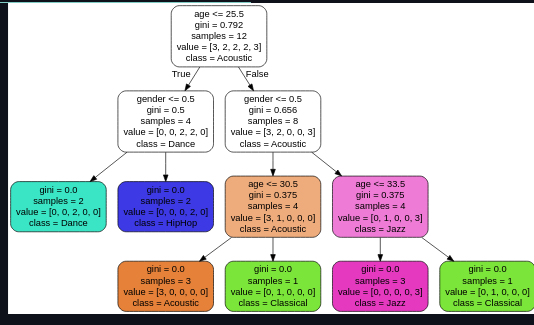